In [48]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy

<ipython-input-48-f939ec2835ff>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [49]:
# Access file from google drive
from IPython.display import Image
from google.colab import drive

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [50]:
# load dataset
import pandas as pd
import os
with open("/content/drive/MyDrive/.../dataset-eng-ful-95.csv", "r") as f:
  df = pd.read_csv(f, header=0, index_col='Nationality', dtype='int64', parse_dates=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55 entries, Brunei Darussalam to Other Africa
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   2006    55 non-null     int64
 1   2007    55 non-null     int64
 2   2008    55 non-null     int64
 3   2009    55 non-null     int64
 4   2010    55 non-null     int64
 5   2011    55 non-null     int64
 6   2012    55 non-null     int64
 7   2013    55 non-null     int64
 8   2014    55 non-null     int64
 9   2015    55 non-null     int64
 10  2016    55 non-null     int64
 11  2017    55 non-null     int64
 12  2018    55 non-null     int64
 13  2019    55 non-null     int64
dtypes: int64(14)
memory usage: 6.4+ KB


In [51]:
df

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Nationality,,,,,,,,,,,,,,
Brunei Darussalam,11154,11594,10536,13668,35874,38679,38679,16932,19078,18262,23695,23455,17279,19278
Malaysia,699124,799990,1009722,1041053,1171737,1173351,1173351,1380686,1418256,1431728,1541197,2121888,2503344,2980753
Philippines,187711,192868,195675,196429,171181,210029,210029,247573,248182,267700,298910,308977,217874,260980
Singapore,1164082,1160200,1197267,1138071,1206360,1324839,1324839,1432060,1559044,1594102,1515699,1554119,1768744,1934445
Thailand,66864,71753,66012,93381,111645,115036,115036,125059,114272,118579,124569,138235,124153,136699
Vietnamese,17154,16392,19710,20785,24929,31106,31106,43249,48018,49845,60986,77466,75816,96024
Myanmar,20538,14413,17487,18128,15582,22304,22304,31001,33559,39923,44720,48133,28612,46381
Other Asean,4924,76333,16300,90861,221668,216474,216474,213602,195201,274302,207727,252373,717508,682630
Hong Kong,72033,63774,58260,63801,73658,84985,84985,95258,94560,93529,101369,98272,91182,50324


In [52]:
# Merubah data kosong atau nol menjadi Nan dengan missing values lalu memanggilnya
missing_values = ["0"]
data_clean = pd.read_csv('/content/drive/MyDrive/.../dataset-eng-ful-95.csv', na_values = missing_values, index_col="Nationality")
data_clean.dropna(inplace=True)
data_clean

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Nationality,,,,,,,,,,,,,,
Brunei Darussalam,11154.0,11594.0,10536.0,13668.0,35874.0,38679.0,38679.0,16932.0,19078.0,18262.0,23695.0,23455,17279,19278
Malaysia,699124.0,799990.0,1009722.0,1041053.0,1171737.0,1173351.0,1173351.0,1380686.0,1418256.0,1431728.0,1541197.0,2121888,2503344,2980753
Philippines,187711.0,192868.0,195675.0,196429.0,171181.0,210029.0,210029.0,247573.0,248182.0,267700.0,298910.0,308977,217874,260980
Singapore,1164082.0,1160200.0,1197267.0,1138071.0,1206360.0,1324839.0,1324839.0,1432060.0,1559044.0,1594102.0,1515699.0,1554119,1768744,1934445
Thailand,66864.0,71753.0,66012.0,93381.0,111645.0,115036.0,115036.0,125059.0,114272.0,118579.0,124569.0,138235,124153,136699
Vietnamese,17154.0,16392.0,19710.0,20785.0,24929.0,31106.0,31106.0,43249.0,48018.0,49845.0,60986.0,77466,75816,96024
Myanmar,20538.0,14413.0,17487.0,18128.0,15582.0,22304.0,22304.0,31001.0,33559.0,39923.0,44720.0,48133,28612,46381
Other Asean,4924.0,76333.0,16300.0,90861.0,221668.0,216474.0,216474.0,213602.0,195201.0,274302.0,207727.0,252373,717508,682630
Hong Kong,72033.0,63774.0,58260.0,63801.0,73658.0,84985.0,84985.0,95258.0,94560.0,93529.0,101369.0,98272,91182,50324


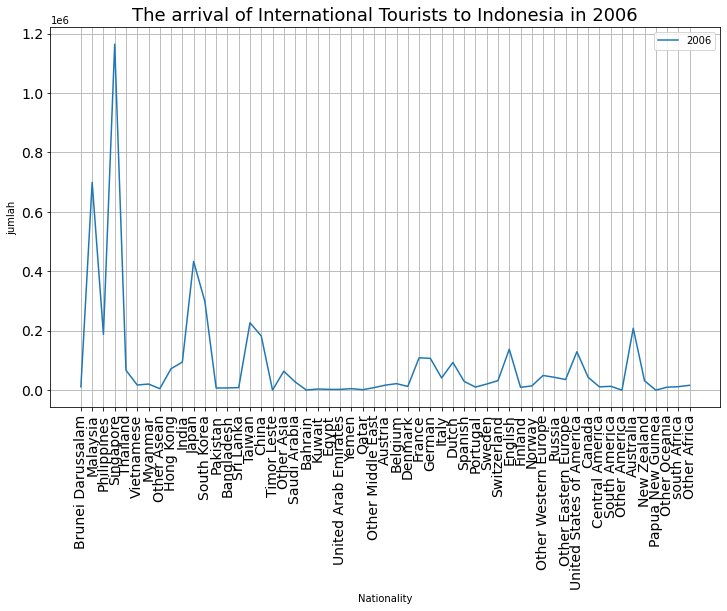

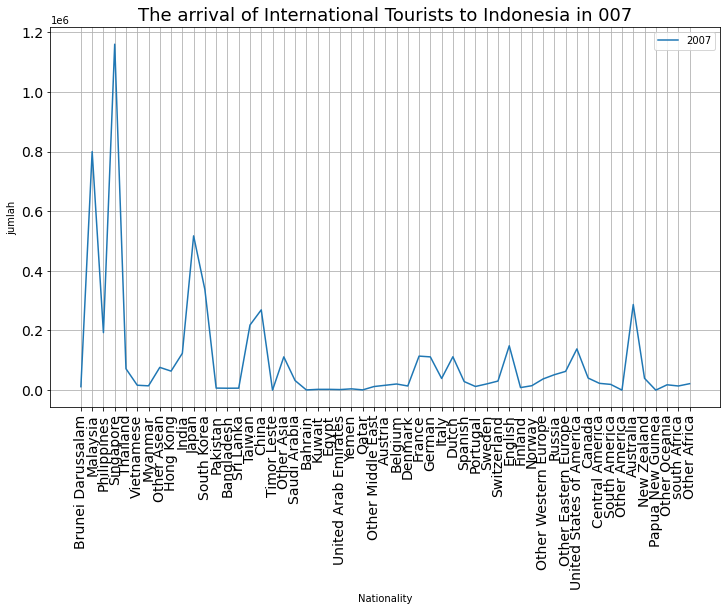

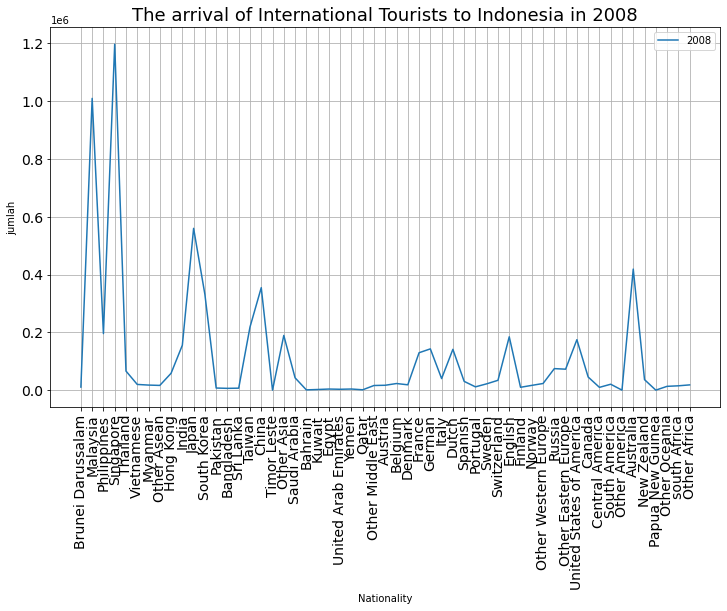

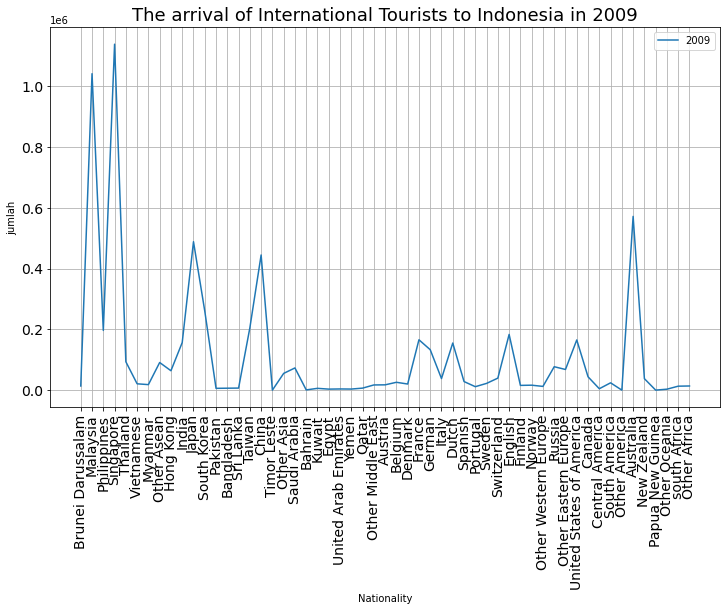

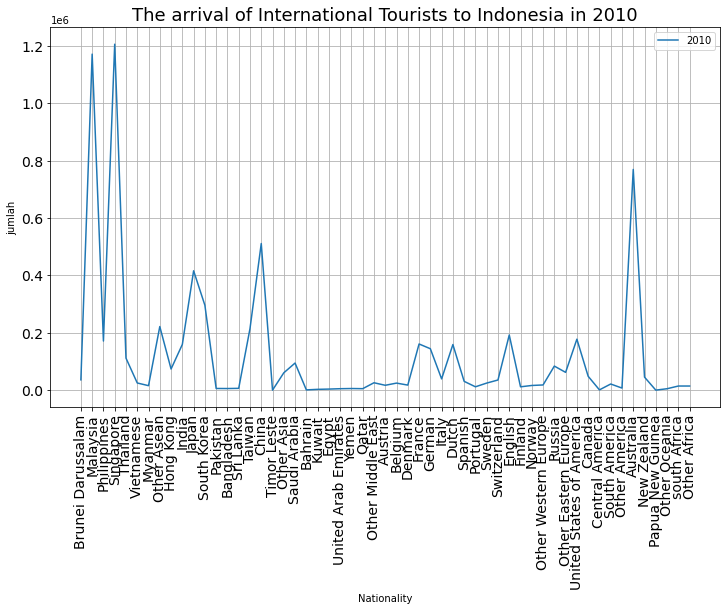

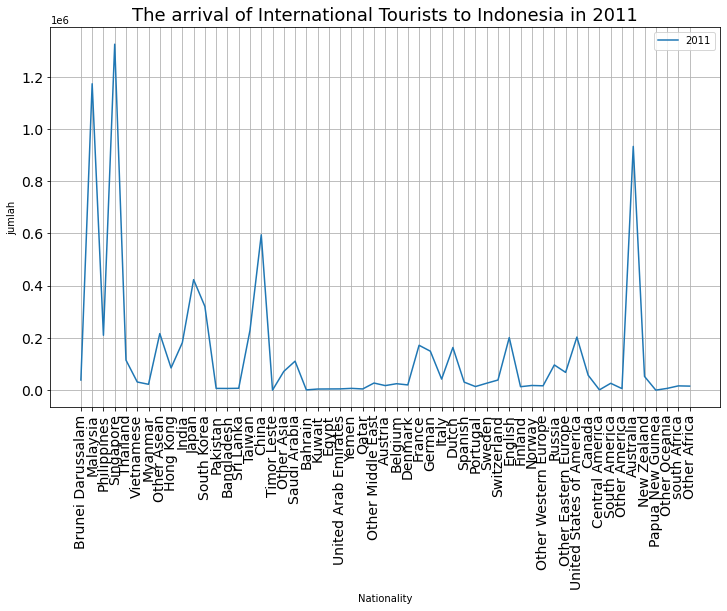

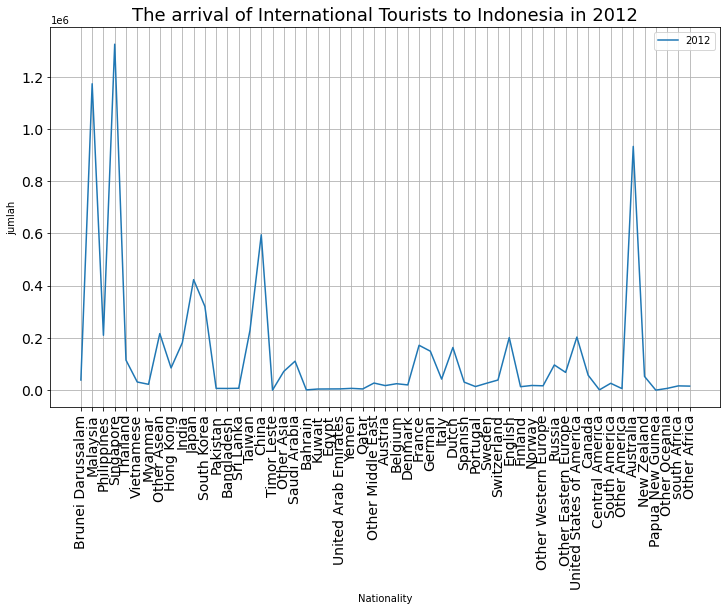

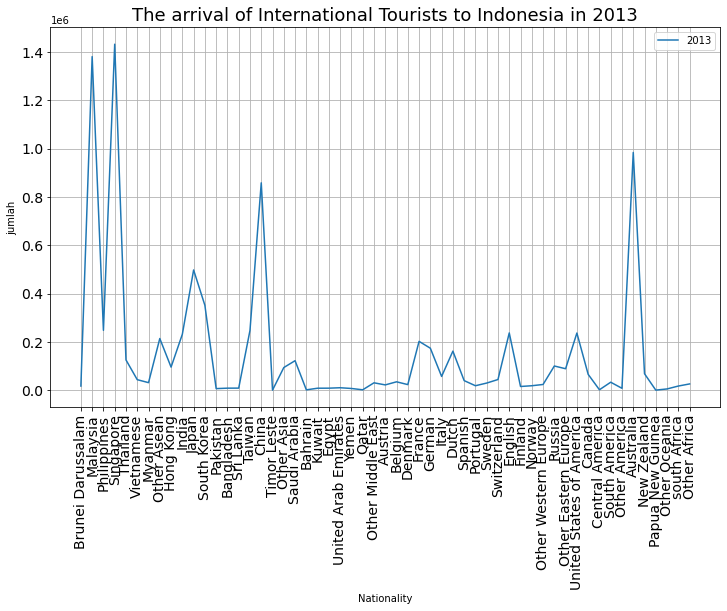

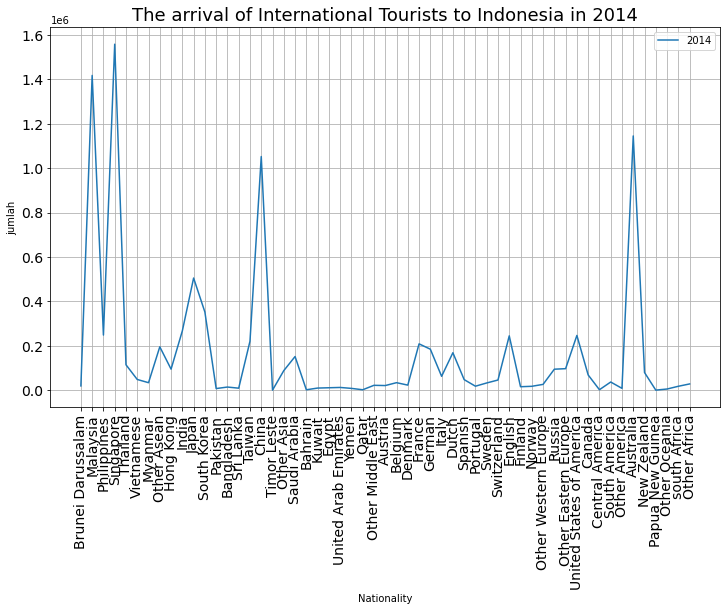

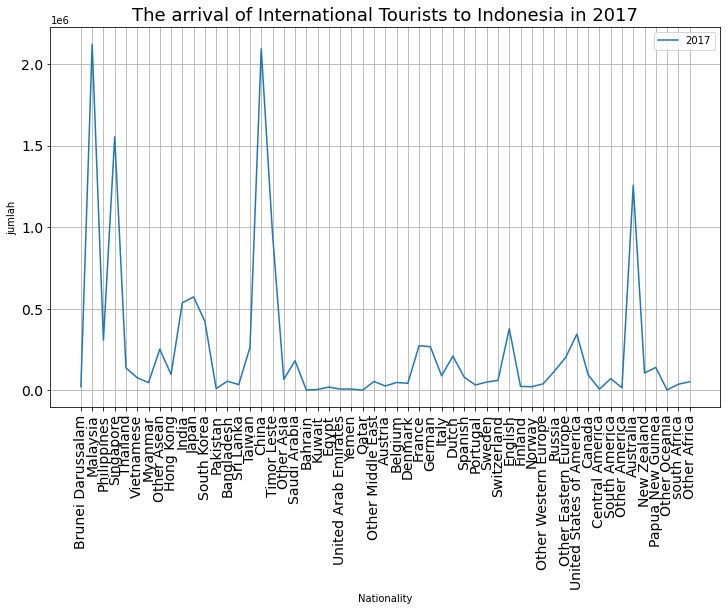

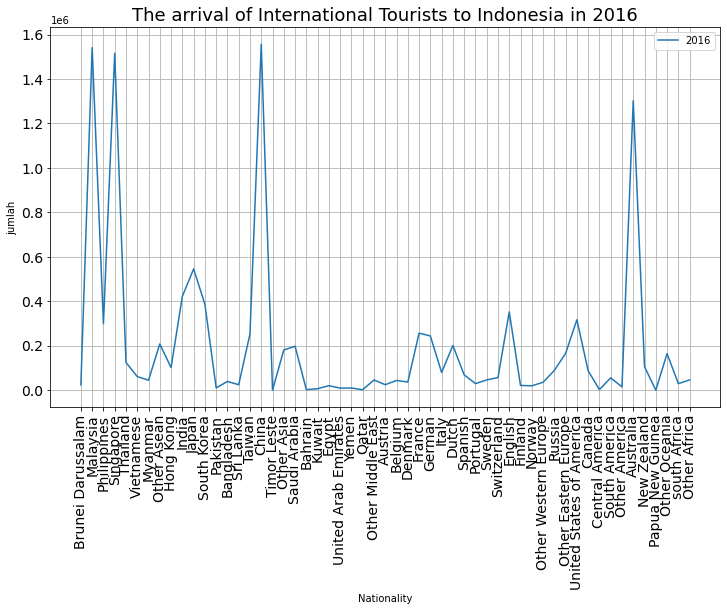

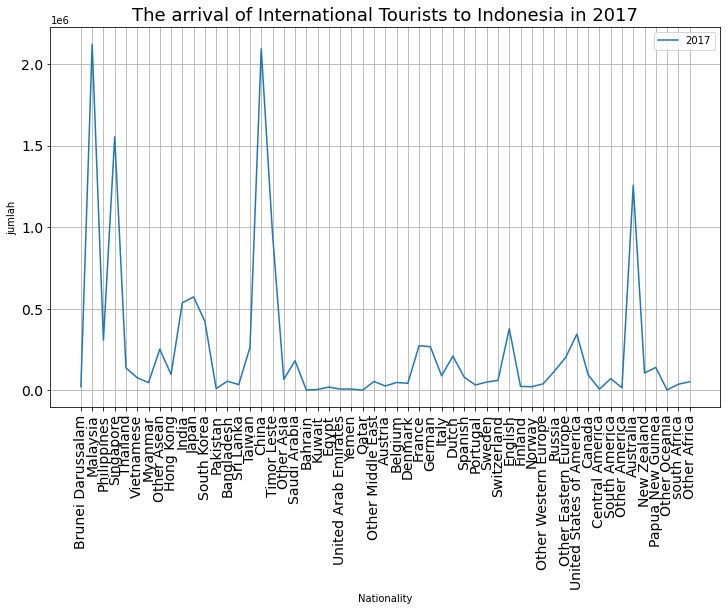

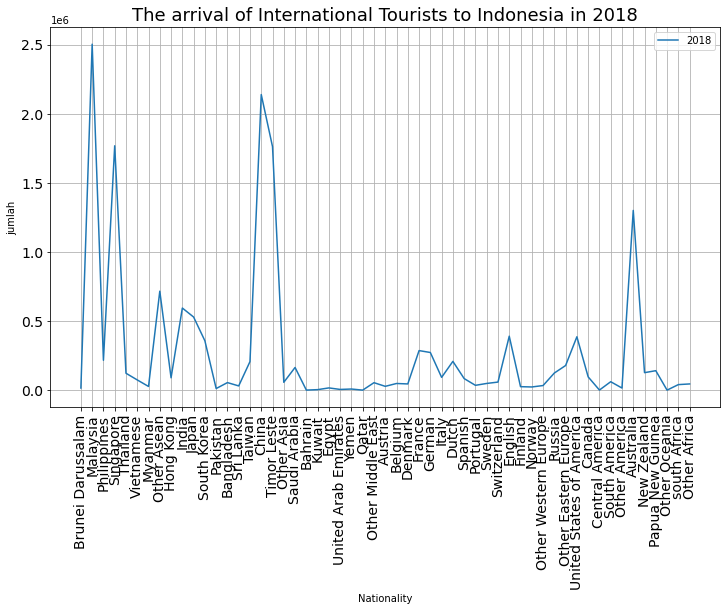

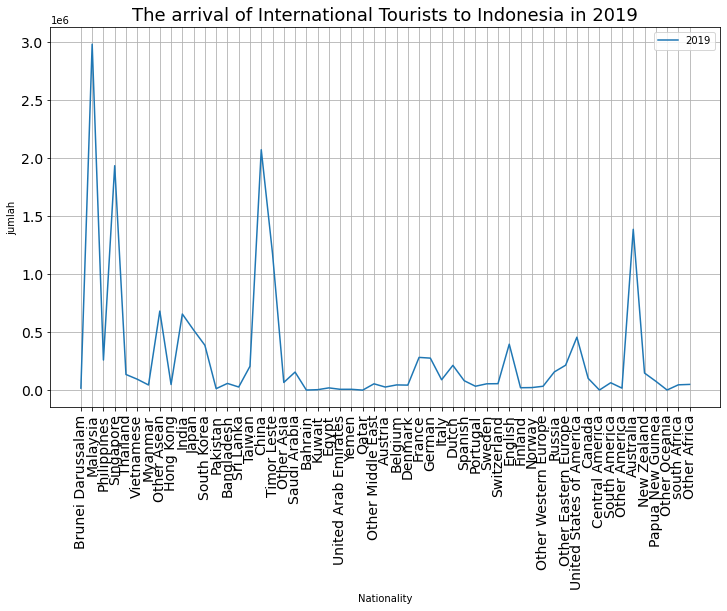

In [53]:
# Visualisasi grafik garis kumpulan data wisatawan mancangera  ke Indonesia
import matplotlib.pyplot as plt
kolom = ["2006","2007","2008","2009","2010","2011","2012","2013","2014","2017","2016","2017","2018","2019"]
judul = ["The arrival of International Tourists to Indonesia in 2006",
         "The arrival of International Tourists to Indonesia in 007",
         "The arrival of International Tourists to Indonesia in 2008",
         "The arrival of International Tourists to Indonesia in 2009",
         "The arrival of International Tourists to Indonesia in 2010",
         "The arrival of International Tourists to Indonesia in 2011",
         "The arrival of International Tourists to Indonesia in 2012",
         "The arrival of International Tourists to Indonesia in 2013",
         "The arrival of International Tourists to Indonesia in 2014",
         "The arrival of International Tourists to Indonesia in 2017",
         "The arrival of International Tourists to Indonesia in 2016",
         "The arrival of International Tourists to Indonesia in 2017",
         "The arrival of International Tourists to Indonesia in 2018",
         "The arrival of International Tourists to Indonesia in 2019",
         "The arrival of International Tourists to Indonesia in 2020"]
for i in range(len(kolom)):
  ax = df.plot(figsize=(12,7), fontsize=14, title=judul[i], ylabel='jumlah', xticks=range(0,55), y=kolom[i], grid=True, rot=90)
  ax.set_title(judul[i], fontdict={'fontsize':18})
  ax

In [54]:
# load dataset
import pandas as pd
import os
with open("/content/drive/MyDrive/.../dataset-eng-ful-95.csv", "r") as f:
  series = pd.read_csv(f, index_col='Tahun', header=0)
series.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 2006 to 2020
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Kebangsaan  825 non-null    object
 1   Jumlah      825 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 19.3+ KB


In [55]:
series

,Kebangsaan,Jumlah
Tahun,,
2006,Brunei Darussalam,11154
2006,Malaysia,699124
2006,Filipina,187711
2006,Singapura,1164082
2006,Thailand,66864
...,...,...
2020,Selandia Baru,134107
2020,Papua Nugini,351972
2020,Oceania Lainnya,154908


In [56]:
# frame a sequence as a supervised learning problem/membuat input output(pelatihan LSTM)
def timeseries_to_supervised(data, lag=1):
	df = DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df

In [57]:
# create a differenced series/bagi dataset
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)

In [58]:
# invert differenced value/evaluasi
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

In [59]:
# scale train and test data to [-1, 1]/preprocessing
def scale(train, test):
	# fit scaler
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaler = scaler.fit(train)
	# transform train
	train = train.reshape(train.shape[0], train.shape[1])
	train_scaled = scaler.transform(train)
	# transform test
	test = test.reshape(test.shape[0], test.shape[1])
	test_scaled = scaler.transform(test)
	return scaler, train_scaled, test_scaled

In [60]:
# inverse scaling for a forecasted value/denormalisasi
def invert_scale(scaler, X, value):
	new_row = [x for x in X] + [value]
	array = numpy.array(new_row)
	array = array.reshape(1, len(array))
	inverted = scaler.inverse_transform(array)
	return inverted[0, -1]

In [61]:
# fit an LSTM network to training data/LSTM
def fit_lstm(train, batch_size, nb_epoch, neurons):
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0], 1, X.shape[1])
    model = Sequential()
    model.add(LSTM(neurons, activation='tanh', batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.summary()
    model.fit(X, y, epochs=nb_epoch, batch_size=batch_size, verbose=1)
    return model

In [62]:
# make a one-step forecast/pengujian
def forecast_lstm(model, batch_size, X):
    X = X.reshape(1, 1, len(X))
    yhat = model.predict(X, batch_size=batch_size)
    return yhat[0,0]

In [63]:
# transform data to be stationary
raw_values = series.Jumlah.values.astype('int64')
diff_values = difference(raw_values, 1)
print('Dataset \n',diff_values)

Dataset 
 0       687970
1      -511413
2       976371
3     -1097218
4       -49710
        ...   
819      55000
820     217865
821    -197064
822     -89437
823      41945
Length: 824, dtype: int64


In [64]:
# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values
print('Supervised Learning Input, Output \n',supervised_values)
print('Jumlah Dataset :', len(supervised_values))

Supervised Learning Input, Output 
 [[      0.  687970.]
 [ 687970. -511413.]
 [-511413.  976371.]
 ...
 [ 217865. -197064.]
 [-197064.  -89437.]
 [ -89437.   41945.]]
Jumlah Dataset : 824


In [65]:
# split data into train and test-sets
train, test = supervised_values[0:-55], supervised_values[-55:]
print('Data Training \n',train)
print('Jumlah Data Training :', len(train))
print('Data Testing \n',test)
print('Jumlah Data Testing :', len(test))

Data Training 
 [[      0.  687970.]
 [ 687970. -511413.]
 [-511413.  976371.]
 ...
 [ -70577.  -75446.]
 [ -75446.   44670.]
 [  44670.    3605.]]
Jumlah Data Training : 769
Data Testing 
 [[ 3.605000e+03  5.614700e+04]
 [ 5.614700e+04 -2.713700e+04]
 [-2.713700e+04  5.899590e+05]
 [ 5.899590e+05  1.664790e+05]
 [ 1.664790e+05 -4.080950e+05]
 [-4.080950e+05  8.317900e+04]
 [ 8.317900e+04 -3.312820e+05]
 [-3.312820e+05 -6.840100e+04]
 [-6.840100e+04 -4.632100e+04]
 [-4.632100e+04  9.430500e+04]
 [ 9.430500e+04 -6.856700e+04]
 [-6.856700e+04  5.072010e+05]
 [ 5.072010e+05 -1.494690e+05]
 [-1.494690e+05 -3.818190e+05]
 [-3.818190e+05  5.323800e+04]
 [ 5.323800e+04 -3.090000e+04]
 [-3.090000e+04  1.279880e+05]
 [ 1.279880e+05  3.699660e+05]
 [ 3.699660e+05  7.148530e+05]
 [ 7.148530e+05 -1.051449e+06]
 [-1.051449e+06 -4.048400e+04]
 [-4.048400e+04 -1.513580e+05]
 [-1.513580e+05  9.366000e+03]
 [ 9.366000e+03  1.341200e+04]
 [ 1.341200e+04 -1.196200e+04]
 [-1.196200e+04  3.360000e+02]
 [ 3

In [66]:
# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)
print('Normalisasi Data Training \n',train_scaled)
print('Jumlah Data Training :', len(train_scaled))
print('Normalisasi Data Testing \n',test_scaled)
print('Jumlah Data Testing :', len(test_scaled))

Normalisasi Data Training 
 [[-0.04254382  0.19964592]
 [ 0.19964592 -0.22257926]
 [-0.22257926  0.30117326]
 ...
 [-0.06738942 -0.06910348]
 [-0.06910348 -0.0268184 ]
 [-0.0268184  -0.04127473]]
Jumlah Data Training : 769
Normalisasi Data Testing 
 [[-0.04127473 -0.02277809]
 [-0.02277809 -0.052097  ]
 [-0.052097    0.16514259]
 [ 0.16514259  0.01606267]
 [ 0.01606267 -0.18620768]
 [-0.18620768 -0.01326187]
 [-0.01326187 -0.15916679]
 [-0.15916679 -0.06662339]
 [-0.06662339 -0.05885045]
 [-0.05885045 -0.00934513]
 [-0.00934513 -0.06668183]
 [-0.06668183  0.13600885]
 [ 0.13600885 -0.09516219]
 [-0.09516219 -0.1769576 ]
 [-0.1769576  -0.02380216]
 [-0.02380216 -0.05342171]
 [-0.05342171  0.00251248]
 [ 0.00251248  0.08769728]
 [ 0.08769728  0.20910969]
 [ 0.20910969 -0.41269101]
 [-0.41269101 -0.05679562]
 [-0.05679562 -0.09582718]
 [-0.09582718 -0.03924666]
 [-0.03924666 -0.03782232]
 [-0.03782232 -0.04675487]
 [-0.04675487 -0.04242554]
 [-0.04242554 -0.0451084 ]
 [-0.0451084  -0.0248

In [67]:
# fit the model
lstm_model = fit_lstm(train_scaled, 1, 1000, 50)
# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)
print(lstm_model)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (1, 50)                   10400     
                                                                 
 dense_3 (Dense)             (1, 1)                    51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
769/769 [==============================] - 6s 4ms/step - loss: 0.0222
Epoch 2/1000
769/769 [==============================] - 3s 4ms/step - loss: 0.0189
Epoch 3/1000
769/769 [==============================] - 3s 4ms/step - loss: 0.0183
Epoch 4/1000
769/769 [==============================] - 4s 5ms/step - loss: 0.0179
Epoch 5/1000
769/769 [==============================] - 4s 5ms/step - loss: 0.0178
Epoch 6/1000
769/769 [=========

In [68]:
# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_lstm(lstm_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)
	# invert differencing
	yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
	# store forecast
	predictions.append(yhat)
	expected = raw_values[len(train) + i + 1]
	#print('Country=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
	print(int(yhat))
 


1/1 [==============================] - 0s 33ms/step
132179
1/1 [==============================] - 0s 33ms/step
184357
1/1 [==============================] - 0s 41ms/step
160948
1/1 [==============================] - 0s 31ms/step
173826
1/1 [==============================] - 0s 27ms/step
858578
1/1 [==============================] - 0s 31ms/step
500632
1/1 [==============================] - 0s 39ms/step
585870
1/1 [==============================] - 0s 34ms/step
245391
1/1 [==============================] - 0s 29ms/step
194059
1/1 [==============================] - 0s 32ms/step
147517
1/1 [==============================] - 0s 31ms/step
230161
1/1 [==============================] - 0s 35ms/step
170480
1/1 [==============================] - 0s 23ms/step
231902
1/1 [==============================] - 0s 23ms/step
535466
1/1 [==============================] - 0s 21ms/step
135956
1/1 [==============================] - 0s 21ms/step
200348
1/1 [==============================] - 0s 33ms/step
1710

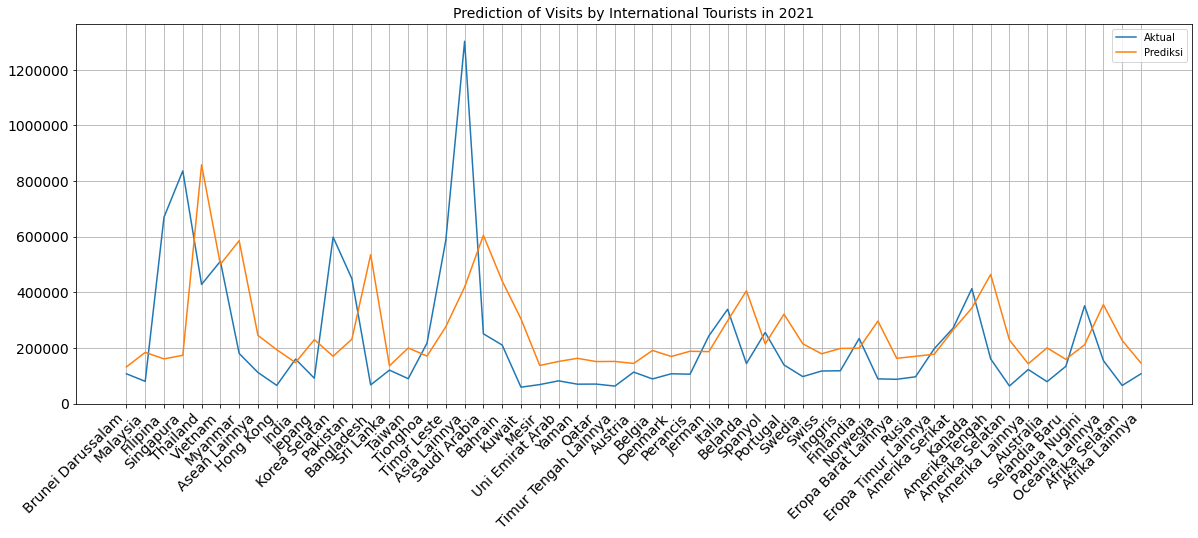

In [69]:
# line plot of observed vs predicted
pyplot.figure(figsize=(20,7))
pyplot.ticklabel_format(style='plain')
pyplot.xticks(ticks=range(0,55), labels=series.Kebangsaan, rotation=45, ha='right', fontsize=14)
pyplot.yticks(fontsize=14)
pyplot.plot(raw_values[-55:])
pyplot.plot(predictions)
pyplot.grid(b=True)
pyplot.title('Prediction of Visits by International Tourists in 2021',fontdict={'fontsize':14})
pyplot.legend(['Aktual','Prediksi'])
pyplot.show()

In [73]:
# report performance/evaluasi
import numpy as np
#Menghitung nilai Root Mean Squared Error (RMSE)
rmse = sqrt(mean_squared_error(raw_values[-55:], predictions))
print('Evaluasi RMSE: %.2f' % rmse)

#Menghitung nilai Mean Absolute Percentage Error (MAPE)
def MAPE(aktual, prediksi):
    aktual, prediksi = np.array(raw_values[-55:]), np.array(predictions)
    return np.mean(np.abs(prediksi)/aktual) * 100
evaluasi_mape = MAPE(raw_values[-55:],predictions)
print('Evaluasi MAPE: %.2f' % (evaluasi_mape))

#Menghitung nilai Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error as mae
error = mae(raw_values[-55:], predictions)
print("Evaluasi MAE : " + str(error))

Evaluasi RMSE: 239857.42
Evaluasi MAPE: 185.90
Evaluasi MAE : 164686.3600560475
